<a href="https://colab.research.google.com/github/Godofin/ImersaoDados-Creditas/blob/main/ImersaoDadosCreditas_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Puxando a base de dados

In [3]:
import pandas as pd

In [10]:
# Add url do dataset do CSV em uma variável
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)


In [16]:
# Plota as primeiras 5 linhas do dataset
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [17]:
# Plota uma linha
dados.sample()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7242,NaN,Vila Caraguatá,São Paulo,160,4,2,2,R$ 480.000


In [23]:
# Query de dados específicos [parametro1][parametro2]....
dados['Bairro'][6522]

'Vila Paulo Silas'

In [25]:
# Traz a informação dos dados e seus tipos do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [38]:
# Média de metragem 

print("Média da metragem da base de dados:", dados.Metragem.mean())
print("Mediana da metragem da base de dados:", dados.Metragem.median())

Média da metragem da base de dados: 442.30065947242207
Mediana da metragem da base de dados: 290.0


In [39]:
dados.Bairro

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [42]:
sum(dados['Bairro'] == "Vila Mariana")

184

In [43]:
tem_imoveis_vila = dados['Bairro'] == "Vila Mariana"
tem_imoveis_vila

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [47]:
imoveis_vila_mariana = dados[tem_imoveis_vila]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [51]:
print("A média de metragem no bairro vila mariana é de:", imoveis_vila_mariana['Metragem'].mean())

A média de metragem no bairro vila mariana é de: 233.6195652173913


In [53]:
dados['Bairro'].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

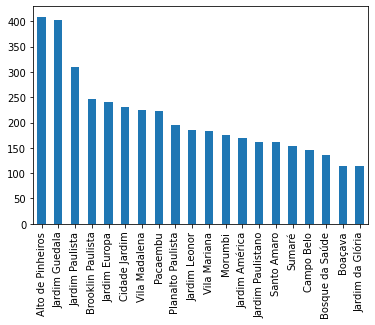

In [56]:
#Plotando um gráfico de barras
N_Imoveis_Bairro = dados['Bairro'].value_counts()
N_Imoveis_Bairro.head(20).plot.bar()

# Desafio 1: Realizar a média da metragem para cada um dos bairros.

In [68]:
dados_bairro = dados.groupby(['Bairro']).mean()
pd.DataFrame(data=dados_bairro['Metragem'])

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


# Desafio 2: Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).

In [71]:
#Forma numero 1
dados['Bairro'].unique()

array(['Planalto Paulista', 'Jardim dos Estados', 'Jardim Reimberg',
       'Jardim Morumbi', 'Mooca', 'Santo Amaro', 'Cidade Mãe do Céu',
       'Jardim Vergueiro', 'Jardim Benfica', 'Vila Alpina',
       'Vila Monumento', 'Jardim Luzitânia', 'Vila Uberabinha',
       'Jardim Prudência', 'Lauzane Paulista', 'Jardim Santa Maria',
       'Vila Nova', 'Itaberaba', 'Vila Nova Conceição', 'Jardim da Saúde',
       'Jardim Santo Antônio', 'Vila Mazzei', 'Vila Madalena',
       'Jardim Ivana', 'Vila Campo Grande', 'Vila Gomes Cardim',
       'Bela Aliança', 'Vila Albertina', 'Cidade Jardim',
       'Parque da Lapa', 'Vila Libanesa', 'Cidade Domitila',
       'Vila Nova Savoia', 'Jardim Maria Estela', 'Parque São Rafael',
       'Vila Bandeirantes', 'Parque Colonial', 'Vila Califórnia',
       'Jardim das Imbuias', 'Vila Tramontano', 'Vila Nancy',
       'Parada Inglesa', 'Jardim Leonor Mendes de Barros', 'Jardim Iva',
       'Jardim Amália', 'Vila dos Remédios', 'Brooklin Paulista',
       '

In [74]:
# Forma 2
pd.DataFrame(data=dados.Bairro.drop_duplicates())

,Bairro
0,Planalto Paulista
1,Jardim dos Estados
2,Jardim Reimberg
3,Jardim Morumbi
4,Mooca
...,...
9815,Parque São Jorge
9843,Vila Reis
9862,Parque das Árvores
9920,Vila São Pedro


# Desafio 3: Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.

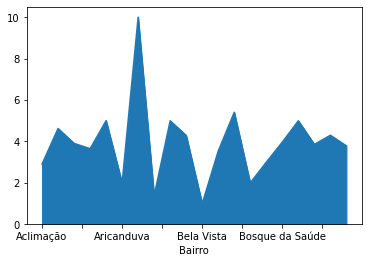

In [80]:
dados_bairro['Vagas'].head(20).plot.area()

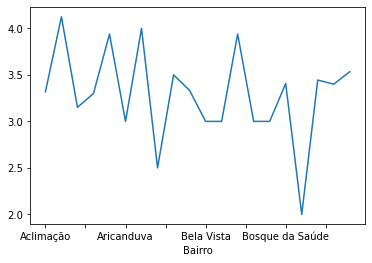

In [83]:
dados_bairro['Quartos'].head(20).plot.line()

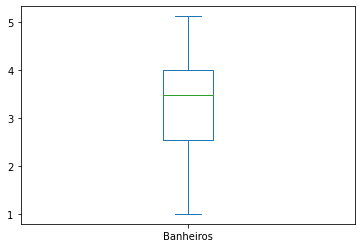

In [86]:
dados_bairro['Banheiros'].head(20).plot.box()

# Desafio 4: Pegar outras estatísticas dos dados (como média, mediana, mim, max). 

In [100]:
filtrar = input("Escolha o bairro: ")
dados_filtrados = (dados['Bairro'] == filtrar)
filtro = dados[dados_filtrados]
media = filtro['Metragem'].mean()
mediana = filtro['Metragem'].median()
soma = filtro['Metragem'].sum()
max = filtro['Metragem'].max()
min = filtro['Metragem'].min()

print(f'O bairro buscado foi:  {filtrar}\nA média de metragem do bairro {filtrar} é de: {media:.2f}\nO bairro {filtrar} contém uma mediana de {mediana}\nA metragem máxima do bairro {filtrar} é de {max}\nA metragem mínima do bairro {filtrar} é de: {min}')

Escolha o bairro: Vila Mariana
O bairro buscado foi:  Vila Mariana
A média de metragem do bairro Vila Mariana é de: 233.62
O bairro Vila Mariana contém uma mediana de 235.5
A metragem máxima do bairro Vila Mariana é de 650
A metragem mínima do bairro Vila Mariana é de: 60


# Desafio 5: Descobrir quais são os bairros que não tem nome de rua.

In [105]:
print(f'No dataset há um total de {sum(dados.Bairro.isnull())} bairros sem nome!')

No dataset há um total de 12 bairros sem nome!
